Importation des librairy qui vont bien pour les svm

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import seed
from numpy.random import randn
import pandas as pd 
import seaborn as sns

Création des données

In [4]:
nbapp=1500
ec=0.5
ec=0.11

a=1
b=10
theta1 = np.random.uniform(0,b*math.pi,(nbapp,1))
theta2 = np.random.uniform(0,b*math.pi,(nbapp,1))
r1=a*theta1
r2=a*theta2
r1.shape,theta1.shape
x1=r1*np.cos(theta1)
y1=r1*np.sin(theta1)
x2=r2*np.cos(theta2+math.pi)
y2=r2*np.sin(theta2+math.pi)
xapp=np.concatenate((x1, x2), axis=0)
yapp=np.concatenate((y1, y2), axis=0)
Xapp=np.concatenate((xapp, yapp), axis=1)+ec*randn(2*nbapp,2)
un=np.ones(nbapp)
Lapp=np.concatenate((un, -un), axis=0)

nbtest=10000
theta1 = np.random.uniform(0,b*math.pi,(nbtest,1))
theta2 = np.random.uniform(0,b*math.pi,(nbtest,1))
r1=a*theta1
r2=a*theta2
r1.shape,theta1.shape
x1=r1*np.cos(theta1)
y1=r1*np.sin(theta1)
x2=r2*np.cos(theta2+math.pi)
y2=r2*np.sin(theta2+math.pi)
xtest=np.concatenate((x1, x2), axis=0)
ytest=np.concatenate((y1, y2), axis=0)
Xtest=np.concatenate((xtest, ytest), axis=1)+ec*randn(2*nbtest,2)
un=np.ones(nbtest)
Ltest=np.concatenate((un, -un), axis=0)

Affichage des données

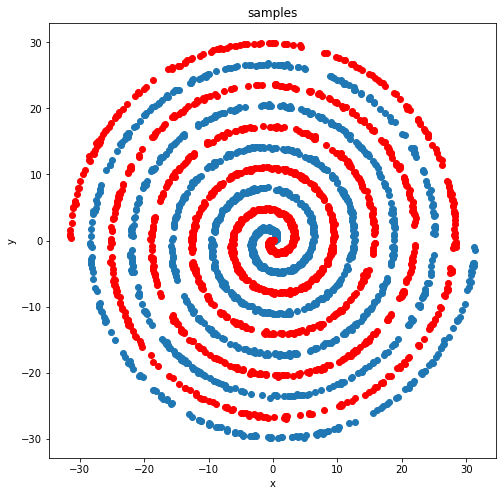

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(Xapp[0:nbapp-1,0],Xapp[0:nbapp-1:,1])
plt.scatter(Xapp[nbapp:2*nbapp-1,0],Xapp[nbapp:2*nbapp-1:,1],c='r')
plt.xlabel('x')  
plt.ylabel('y')  
  

plt.title("samples") 
plt.show()

Apprentissage

In [6]:
classifier = svm.SVC(kernel='linear')
#classifier = svm.SVC(kernel='poly',degree=2,C=10)
#classifier = svm.SVC(kernel='rbf',gamma=0.81,C=0.11)
classifier.fit(Xapp, Lapp)
y_app_pred = classifier.decision_function(Xapp)
lab_app_pred = np.sign(y_app_pred)
y_test_pred = classifier.decision_function(Xtest)
lab_test_pred = np.sign(y_test_pred)

eval_app=lab_app_pred-Lapp
eval_test=lab_test_pred-Ltest

Evaluation des performances

In [7]:
[sum(abs(eval_app))/nbapp/4,sum(abs(eval_test))/nbtest/4]

[0.4796666666666667, 0.47345]

Parcours d'une grille 2D pour affichage de la valeur de la fonction SVM

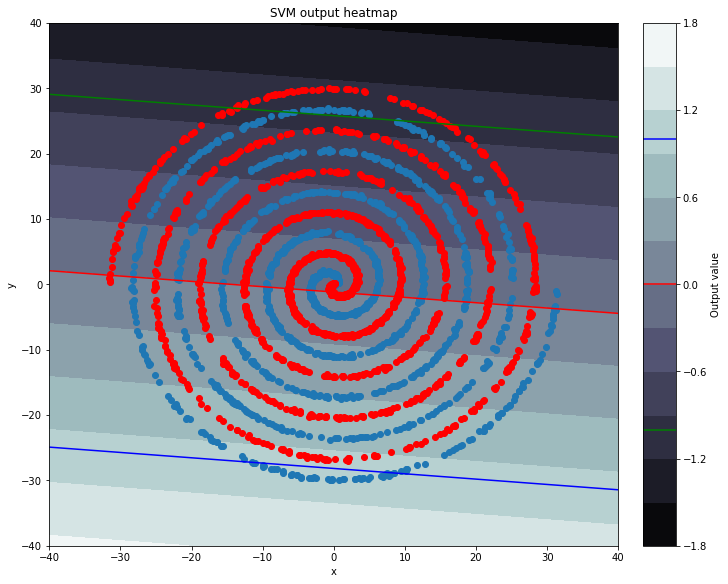

In [8]:
BX=40 
BY=40
origin = 'lower'
nbs=100
delta=(2*BX)/(nbs-1)
x = y = np.arange(-BX, BX+0.0001, delta)
X, Y = np.meshgrid(x, y)
Xr=np.reshape(X,(nbs*nbs,1))
Yr=np.reshape(Y,(nbs*nbs,1))
Xmap=np.concatenate((Xr, Yr), axis=1)
Ymapr = classifier.decision_function(Xmap)
Ymap=np.reshape(Ymapr,(nbs,nbs))
Ymap.shape

fig1, ax1 = plt.subplots(constrained_layout=True,figsize=(10,8))
CS = ax1.contourf(X, Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#CS2 = ax1.contour(CS, levels=CS.levels[::1], colors='r', origin=origin)
CS2 = ax1.contour(CS, levels=(-1,0,1), colors=('g','r','b'), origin=origin)
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

ax1.scatter(Xapp[0:nbapp-1,0],Xapp[0:nbapp-1:,1])
ax1.scatter(Xapp[nbapp:2*nbapp-1,0],Xapp[nbapp:2*nbapp-1:,1],c='r')

plt.show()

Estimation de l'AUC

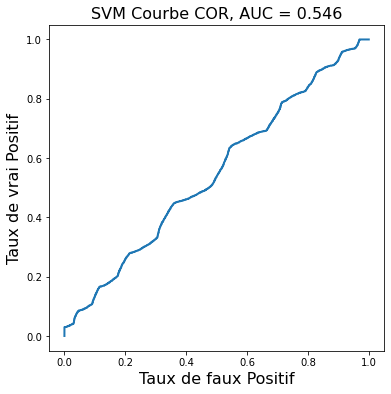

In [9]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Ltest,y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='Lineaire, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('Taux de faux Positif', fontsize=16)
plt.ylabel('Taux de vrai Positif', fontsize=16)
plt.title('SVM Courbe COR, AUC = %.3f'%auc, fontsize=16)

# afficher l'image
plt.show()